<a href="https://colab.research.google.com/github/chelsea591/Machine_Learning_Qlab_PC/blob/main/PC2/PC2_Ejercicio_2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica Calificada 2**
*Integrantes:*
* Lesly Guzmán (20212335)
* Angie Quispe (20231371)
* Marilia Aripazana (20203893)
* Chelsea Torres (20200891)

##**1. Regularización Para Predecir Precios de Viviendas**

Utilizarán el dataset Boston Housing, que contiene información sobre viviendas en los suburbios de Boston. El objetivo es predecir el valor de las viviendas ocupadas por sus propietarios (medv).

**1.1. Preparación de Datos**

a) Explore la base de datos, verifique si hay valores nulos y revise los tipos de datos. No hay variables categóricas que necesiten ser convertidas

In [1]:
# Importar librerías
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', message="Coordinate descent without L1 regularization may lead to unexpected results and is discouraged.")
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [10]:
import numpy as np
import pandas as pd
from functools import partial

import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


from matplotlib.pyplot import subplots

In [3]:
# Limpiar y explorar la base de datos
housing = pd.read_csv(' https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv')
housing = housing.dropna()
housing = housing.drop(columns = ['Unnamed: 0'])
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [4]:
housing.shape

(506, 13)

In [5]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
housing.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


b) Separe los datos en predictores (X) y la variable objetivo (Y, la columna medv)

In [7]:
Y = np.array(housing['medv'])
X = housing.drop(columns=['medv'])

c) Divida los datos en un conjunto de entrenamiento (80 %) y un conjunto de prueba (20 %)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

d) Estandarice las características en X usando `StandardScaler`

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (404, 12)
Shape of X_test_scaled: (102, 12)


## **Parte 2: Métodos de Ensamble para Predecir Ventas y Comparación Final**



### **2.1 Preparación de Datos**


In [ ]:
# Notebook configuration
import six
import sys
from IPython.display import Image
sys.modules['sklearn.externals.six'] = six

# Basic
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from io import StringIO
from IPython.display import Image

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Matplotlib configuration
%matplotlib inline
plt.style.use('seaborn-v0_8-white')

In [ ]:
# Definimos la función para graficar los árboles
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

####**a) Explore la base de datos, verifique si hay valores nulos y revise los tipos de datos.**

In [ ]:
# Cargamos la base
carseats = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/carseats.csv').drop('Unnamed: 0', axis=1)


In [ ]:
# Vemos que cargo bien la base y algunos encabezados.
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
# Vemos si hay datos nulos y los tipos de datos
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


- Vemos que ninguna variable tiene valores nulos, todas las colummnas poseen 400 observaciones.
- Vemos que 7 de las 11 variables son del tipo entero. Ademas, hay 3 variables que son categóricas. Finalmente, una variable del tipo decimal.

In [ ]:
# Tratamiento de variables categóricas
# El dataset Carseats tiene variables de texto (ShelveLoc, Urban, US) que los modelos no leen directamente.
# Por eso, las convertimos en numéricas factorizandolas

carseats['ShelveLoc'] = carseats['ShelveLoc'].factorize()[0]
carseats['Urban'] = carseats['Urban'].factorize()[0]
carseats['US'] = carseats['US'].factorize()[0]


####**b) Separe los datos en predictores (X) y la variable objetivo (y, la columna Sales).**

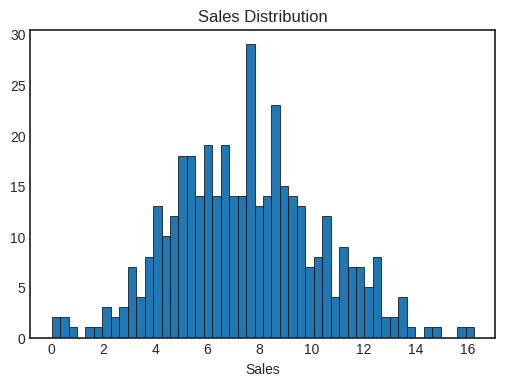

In [ ]:
# Vemos la distribución de Sales para decidir aplicar el logaritmo.
X = carseats[['CompPrice', 'Income', 'Advertising', 'Population', 'Price','Age','Education','ShelveLoc','Urban', 'US']].values
y = carseats.Sales.values

# Configuración de una sola figura
plt.figure(figsize=(6, 4))

# Crear el histograma
plt.hist(y, bins=50, edgecolor='black', linewidth=0.5)
plt.xlabel('Sales')
plt.title('Sales Distribution')

plt.show()

Se observa la forma de una campana por lo que no es necesario convertirlo a logaritmo.

In [ ]:
# 1. Definimos los predictores
X = carseats.drop('Sales', axis=1)

# 2. Definimos 'y'
y = carseats.Sales.values

# --- Verificamos ---
print("Nuevas columnas:", X.columns.tolist())

Nuevas columnas: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']


####**c) Divida los datos en un conjunto de entrenamiento (`80 %`) y un conjunto de prueba (`20 %`), usando `random state=10`.**

In [ ]:
# Dividimos la data en entrenamiento y testeo
target = [ 'Sales' ]
predictors = [ var for var in carseats.columns if var not in target ]

X_train, X_test, y_train, y_test = train_test_split(carseats[predictors], carseats[target], test_size=0.2, random_state=10)

In [ ]:
# Vector unidimensional para las Ys para prepararlos para los algoritmos.
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


### **2.2 Modelos de Ensamble: Versión Base vs. Versión Optimizada**

#### **a) Modelos Base a Criterio Propio:**

* **Entrene un ```Bagging Regressor``` usando hiperparámetros que considere razonables.**

In [ ]:
bagging = BaggingRegressor(n_estimators=100, max_features=0.7, random_state=10)
bagging.fit(X_train, y_train)

BaggingRegressor(max_features=0.7, n_estimators=100, random_state=10)

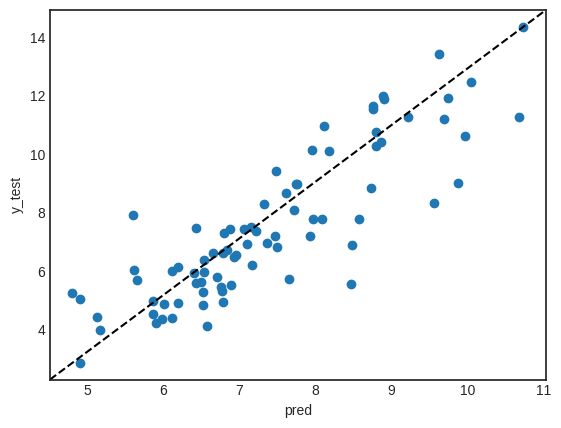

In [ ]:
y_pred = bagging.predict(X_test)

plt.scatter(y_pred, y_test, label='Sales')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [ ]:
mse_bag = round( mean_squared_error(y_test, y_pred), 3 )
r2_bag = round( r2_score(y_test, y_pred), 3 )

metrics_bag = pd.DataFrame({
    'Model': ['Bagging'],
    'Mean Squared Error (MSE)': [mse_bag],
    'R-squared (R2)': [r2_bag]
})
metrics_bag

,Model,Mean Squared Error (MSE),R-squared (R2)
0,Bagging,2.323,0.641


* **Entrene un ```Random Forest Regressor``` usando hiperparámetros que considere razonables**

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_features=0.7, random_state=10)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.7, random_state=10)

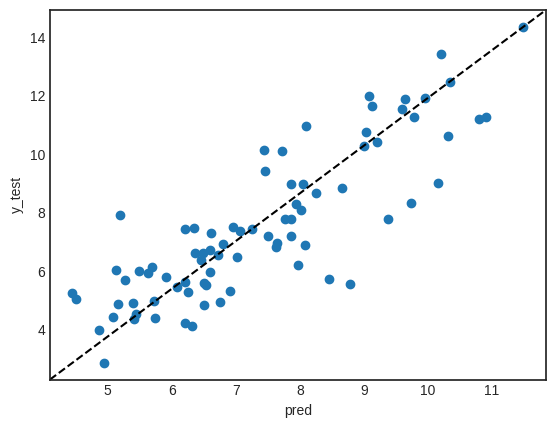

In [ ]:
y_pred = rf.predict(X_test)

plt.scatter(y_pred, y_test, label='Sales')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [ ]:
mse_rf = round( mean_squared_error(y_test, y_pred), 3 )
r2_rf = round( r2_score(y_test, y_pred), 3 )

metrics_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Mean Squared Error (MSE)': [mse_rf],
    'R-squared (R2)': [r2_rf]
})
metrics_rf

,Model,Mean Squared Error (MSE),R-squared (R2)
0,Random Forest,2.038,0.685


* **Entrene un ```Gradient Boosting Regressor``` usando hiperparámetros que considere razonables.**

In [ ]:
boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=10)
boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=10)

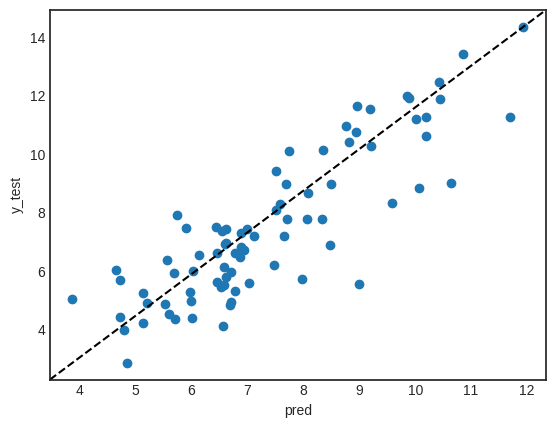

In [ ]:
y_pred = boost.predict(X_test)

plt.scatter(y_pred, y_test, label='Sales')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [ ]:
mse_boost = round( mean_squared_error(y_test, y_pred), 3 )
r2_boost = round( r2_score(y_test, y_pred), 3 )

metrics_boost = pd.DataFrame({
    'Model': ['Gradient Boosting Regressor'],
    'Mean Squared Error (MSE)': [mse_boost],
    'R-squared (R2)': [r2_boost]
})
metrics_boost

,Model,Mean Squared Error (MSE),R-squared (R2)
0,Gradient Boosting Regressor,1.857,0.713


Comparando los resultados:

In [ ]:
metrics_combined = pd.concat([metrics_bag, metrics_rf, metrics_boost])
metrics_combined = metrics_combined.sort_values('R-squared (R2)', ascending=False).reset_index(drop=True)
metrics_combined

,Model,Mean Squared Error (MSE),R-squared (R2)
0,Gradient Boosting Regressor,1.857,0.713
1,Random Forest,2.038,0.685
2,Bagging,2.323,0.641


De acuerdo con la métrica solicitada (Error Cuadrático Medio - MSE), observamos lo siguiente:
* El modelo que tiene mejor desempeño es el **Gradient Boosting Regressor** ya que tiene el menor MSE (1.857), lo que indica que tiene un menor promedio de los errores en las predicciones. Además posee el mayor R-square 0.71 explicando mayor variabiblidad de las ventas.
* Respecto al modelo **Random Forest**, con un MSE de 2.038, redujo el error comparado con el modelo **Bagging** (2.323), pero obtuvo un MSE mayor que el **Gradient Bosting**, perdiendo precisión.

#### **b) Modelos Optimizados con GridSearchCV:**


- Optimice un BaggingRegressor usando `GridSearchCV (cv=5)`. Pruebe con: `{’n estimators’: [50, 100, 200]}`.
- Optimice un RandomForestRegressor. Pruebe: `{’n estimators’: [100, 200], ’max features’: [’sqrt’, 5, 10]}`. Indique cuales son las variables mas importantes segun el modelo.
- Optimice un GradientBoostingRegressor. Pruebe: `{’n estimators’: [100, 200], ’learning rate’: [0.01, 0.1], ’max depth’: [3, 5]}`.

Para cada modelo, evalue el MSE del mejor estimador encontrado sobre el conjunto de prueba.


In [ ]:
# Se toman estos modelos y se les asignan parametros para probar. Se les guarda en un diccionario

models = [
    {
        'name': 'Bagging',
        'model': BaggingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200]    #son los numeros estimadores : cantidad de arboles que usa cada metodo
        }
    },
    {
        'name': 'Random Forest Regressor',
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 200],
            'max_features': ['sqrt', 5, 10]
        }
    },
    {
        'name': 'Gradient Boosting Regressor',
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],   #ratios de aprendizaje
            'max_depth': [3, 5]
        }
    }


]

In [ ]:
results = []
rf_feature_importances = None

for model in models:
    grid = GridSearchCV(
        model['model'],
        model['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        return_train_score=True
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    # Importancia de variables SOLO para Random Forest
    if model['name'] == 'Random Forest Regressor':
        rf_importance = pd.Series(
            best_model.feature_importances_,
            index=X_train.columns
        ).sort_values(ascending=False)

        print("\nImportancia de variables - Random Forest")
        print(rf_importance)

    # Evaluación en test
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': model['name'],
        'MSE': round(mse, 3),
        'R Squared': round(r2, 3),
        'Best Params': grid.best_params_
    })



Importancia de variables - Random Forest
Price          0.299746
ShelveLoc      0.286425
CompPrice      0.100355
Age            0.095422
Advertising    0.082701
Income         0.056912
Population     0.039495
Education      0.028443
US             0.006091
Urban          0.004409
dtype: float64


El modelo de Random Forest sugiere que las decisiones de precio y la ubicación del producto en el punto de venta (ShelveLoc) explican la mayor parte de la variabilidad en las ventas, mientras que las características demográficas tienen un rol secundario.

In [ ]:
df_results = pd.DataFrame(results).sort_values('R Squared', ascending=False).reset_index(drop=True)
df_results

,Model,MSE,R Squared,Best Params
0,Gradient Boosting Regressor,1.700,0.737,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
1,Bagging,1.872,0.711,{'n_estimators': 200}
2,Random Forest Regressor,1.881,0.709,"{'max_features': 10, 'n_estimators': 200}"


El Gradient Boosting Regressor presenta el menor MSE y el mayor R cuadrado en el conjunto de prueba, por lo que es el modelo con mejor desempeño predictivo entre los evaluados.

#### **c) Compare el MSE de los modelos base con el de los modelos optimizados. ¿Mejoró el rendimiento después de usar `GridSearchCV`? ¿Por que es importante el ajuste de hiperparámetros?**

- La comparación entre los modelos base y los modelos optimizados muestra una reducción sistemática (en los 3 modelos) del MSE tras el uso de GridSearchCV.
- Esto evidencia la importancia del ajuste de hiperparámetros, ya que permite adaptar la complejidad del modelo a la estructura de los datos, mejorando la capacidad de generalización y reduciendo el error de predicción en el conjunto de prueba.

## **2.3. Comparación Final y Conclusión**

#### **a) Cree una tabla resumen que compare el MSE en el **conjunto de prueba** para los 3 modelos optimizados ajustados con `GridSearchCV`. ¿Qué modelo tiene el mejor rendimiento?**

In [ ]:
df_mse_comparison = df_results[['Model', 'MSE']].sort_values('MSE')
df_mse_comparison

,Model,MSE
0,Gradient Boosting Regressor,1.700
1,Bagging,1.872
2,Random Forest Regressor,1.881


El modelo con mejor rendimiento es el Gradient Boosting Regressor, ya que presenta el menor MSE en el conjunto de prueba.

#### **b) Basado en la tabla de comparacion final, ¿que modelo le recomendarıa a la empresa para predecir las ventas? Justifique su eleccion considerando el **rendimiento predictivo** (MSE) y la **interpretabilidad** de los modelos.**

- Con base en la tabla de comparación final, se recomienda el Gradient Boosting Regressor para predecir las ventas de la empresa. Este modelo presenta el menor MSE en el conjunto de prueba, lo que indica un mejor rendimiento predictivo frente a los modelos de Bagging y Random Forest.

- Si bien su interpretabilidad es menor en comparación con otros modelos basados en árboles, el Gradient Boosting permite identificar la importancia relativa de las variables explicativas. Dado que el objetivo principal es maximizar la precisión de las predicciones, se considera adecuado priorizar este modelo, aceptando una menor interpretabilidad a cambio de un mejor desempeño.